In [51]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.svm import LinearSVC as SVM
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import confusion_matrix,classification_report,mean_absolute_error
import pandas as pd
import numpy as np

カテゴリ分類で作られた決定境界の直線の数式を出力

In [52]:
df=pd.read_csv("iris.csv")
df.head()

,category,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0,5.1,3.5,1.4,0.2
1,0,4.9,3.0,1.4,0.2
2,0,4.7,3.2,1.3,0.2
3,0,4.6,3.1,1.5,0.2
4,0,5.0,3.6,1.4,0.2


In [53]:
y_name="category"
y=df[y_name].values
x_table=df.drop([y_name],axis=1)
x_name=x_table.columns
x=x_table.values

SVMを使用する。実際にはマージンを調整することでより正確になる

In [54]:
model=SVM()#マージンを調節するとより正確になる
model.fit(x,y)
y_pred=model.predict(x)

C:\Users\decar\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


混合行列を出力

In [55]:
df_m=pd.DataFrame(confusion_matrix(y,y_pred))
df_m

,0,1,2
0,50,0,0
1,0,47,3
2,0,2,48


精度を出力する。この時、精度に不備がある場合算出された数式はあてにならない

In [56]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.94      0.95        50
           2       0.94      0.96      0.95        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [57]:
fout=model.coef_
b=model.intercept_
b=b.reshape(-1,1)
fout=np.hstack((fout,b))

クラス別分類直線を出力

In [58]:
col=list(x_name)
col.append("intercept")
df_fout=pd.DataFrame(fout)
df_fout.columns=col
df_fout

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),intercept
0,0.184237,0.451227,-0.807937,-0.450712,0.109563
1,0.052864,-0.888719,0.401905,-0.936775,1.663749
2,-0.850710,-0.986702,1.381043,1.865398,-1.709583


生データでは尺度が違うため数値の影響を加味した数式を算出(0～1に正規化することで係数の大きい項目が影響力の強い項目と分かる)

In [59]:
x=minmax_scale(x)
model.fit(x,y)
y_pred=model.predict(x)

In [60]:
df_m=pd.DataFrame(confusion_matrix(y,y_pred))
df_m

,0,1,2
0,50,0,0
1,0,45,5
2,0,3,47


In [61]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.90      0.92        50
           2       0.90      0.94      0.92        50

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



In [62]:
fout=model.coef_
b=model.intercept_
b=b.reshape(-1,1)
fout=np.hstack((fout,b))

In [63]:
col=list(x_name)
col.append("intercept")
df_fout=pd.DataFrame(fout)
df_fout.columns=col
df_fout

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),intercept
0,-0.612044,1.319494,-1.773785,-1.685434,0.588279
1,0.101019,-2.273606,1.227485,-1.167294,0.562983
2,-0.086565,-1.064242,2.261643,3.250394,-3.168257


目的変数が数値である場合の数式化

In [67]:
df=pd.read_csv("boston.csv")
df.head()

,PRICE,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [68]:
y_name="PRICE"
y=df[y_name].values
x_table=df.drop([y_name],axis=1)
x_name=x_table.columns
x=x_table.values

精度の算出(最も直感的な値として絶対誤差を使用)

In [69]:
model=LR()
model.fit(x,y)
y_pred=model.predict(x)
print(mean_absolute_error(y,y_pred))

3.2708628109003155


相関係数で精度の確認と外れ値などの確認のため散布図を出力

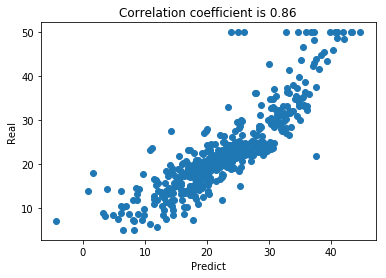

In [72]:
import matplotlib.pyplot as plt
pr=np.array([y_pred,y])
plt.scatter(y_pred,y)
plt.title("Correlation coefficient is %.2f"%(np.corrcoef(pr)[0][1]))
plt.xlabel("Predict")
plt.ylabel("Real")
plt.show()

数式を作成

In [74]:
fout=model.coef_
b=model.intercept_
fout=np.hstack((fout,b))

t値を算出(t値の絶対値が大きいほど正負の数値に影響を与える)

In [84]:
sse=np.sum((y-y_pred)**2,axis=0)
sse=sse/(x.shape[0]-x.shape[1]-1)
s=np.linalg.inv(np.dot(x.T,x))
std_err=np.sqrt(np.diagonal(sse*s))
t=model.coef_/std_err
dat=[fout,t]

In [85]:
df_fout=pd.DataFrame(dat)
col=list(x_name)
col.append("intercept")
ind=["fout","t-value"]
df_fout.columns=col
df_fout.index=ind
df_fout

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,intercept
fout,-0.108011,0.046420,0.020559,2.686734,-17.766611,3.809865,0.000692,-1.475567,0.306049,-0.012335,-0.952747,0.009312,-0.524758,36.459488
t-value,-3.293348,3.382502,0.334836,3.119533,-5.551634,12.935705,0.052590,-7.916161,4.811897,-3.299806,-9.101082,3.624213,-10.844389,NaN
